# Global Model Interpretability with PyCaret: REGRESSION

### References:
- [[Docs-Pycaret] Analyze](https://pycaret.gitbook.io/docs/get-started/functions/analyze)

In [1]:
from pycaret.regression import *
from pycaret.datasets import get_data


## load data

In [2]:
data = get_data('house')
data.shape

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

(1460, 81)

### model

In [3]:
sm = setup(
    data = data,
    target = "SalePrice",
    train_size = 0.8,
    test_data = None,
    data_split_shuffle = True,
    fold_strategy = "kfold",
    fold = 5,
    fold_shuffle = True,
    n_jobs = -1,
    verbose = True
)

# creating a model
clf = create_model('rf')

### model interpretability

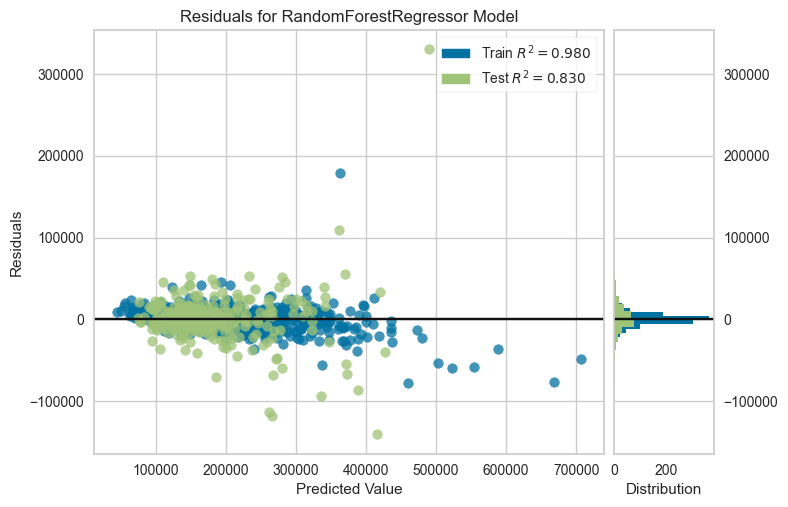

In [4]:
plot_model(clf, use_train_data=False, plot='residuals')

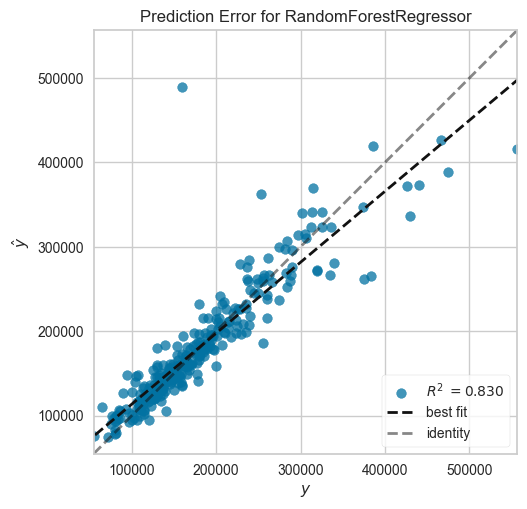

In [5]:
plot_model(clf, use_train_data=False, plot='error')

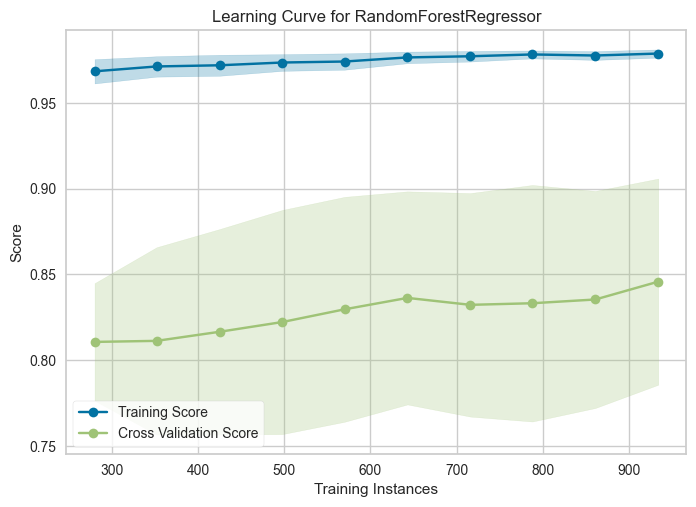

In [6]:
plot_model(clf, use_train_data=False, plot='learning')

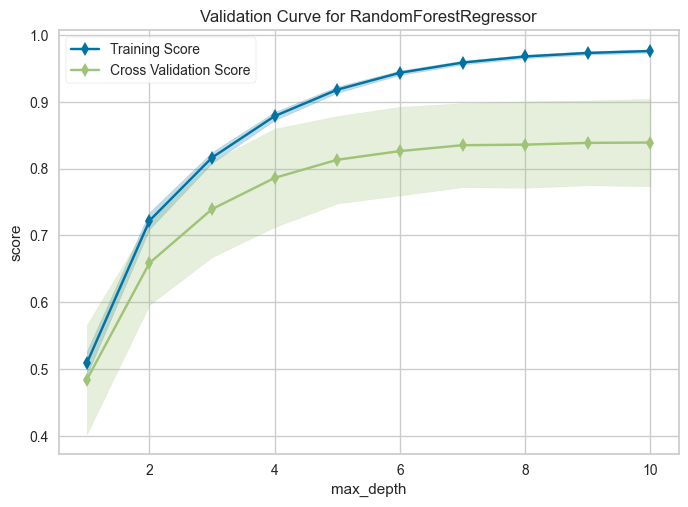

In [7]:
plot_model(clf, use_train_data=False, plot='vc')

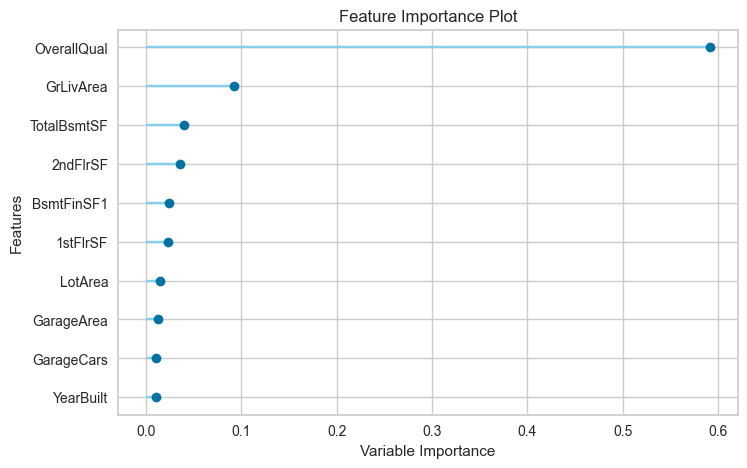

In [8]:
plot_model(clf, use_train_data=False, plot='feature')

In [9]:
interpret_model(clf, plot = 'pfi')

280it [00:15, 17.62it/s]


In [20]:
interpret_model(clf, plot = 'pdp', feature = 'OverallQual')

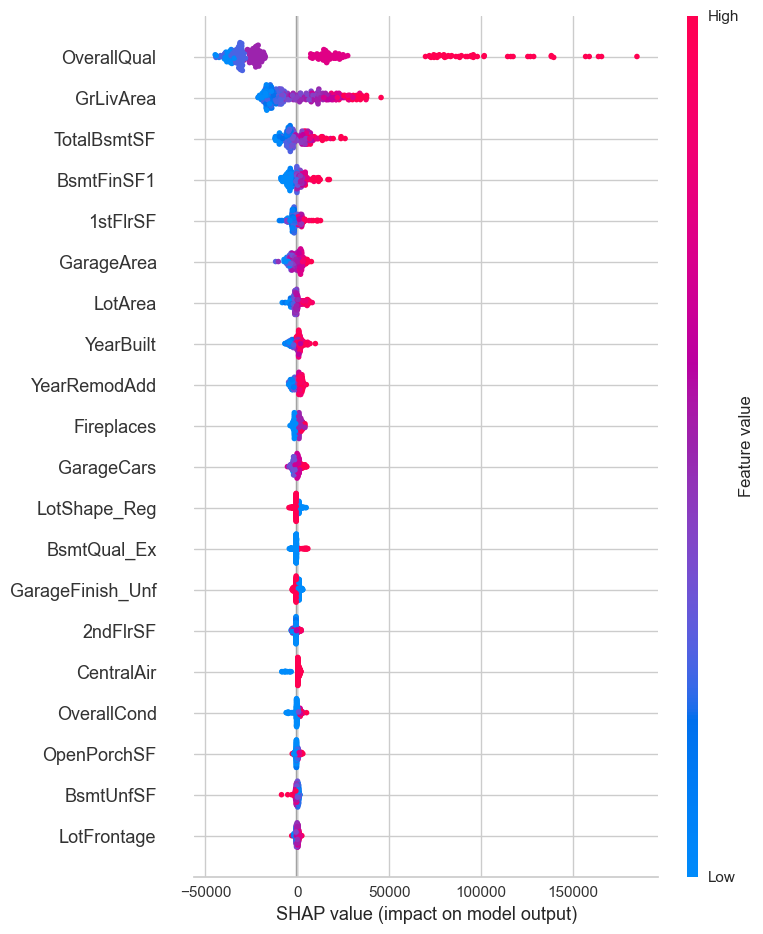

In [10]:
# interpret model
interpret_model(clf, use_train_data = False)

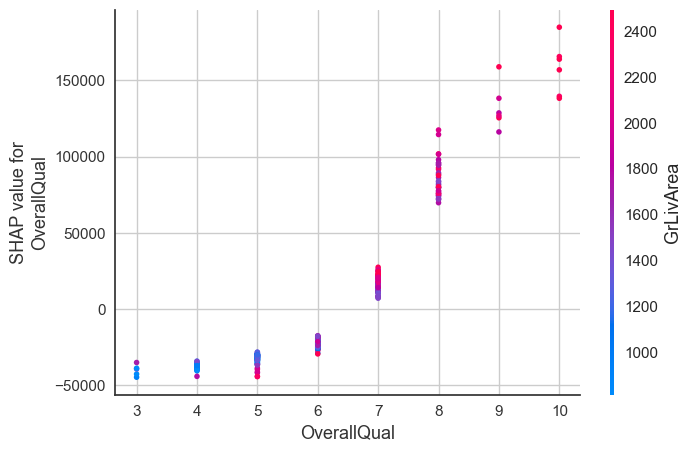

In [11]:
# feature = target feature to be analized in x-axis. In y-axis I think is selected automatically with the most correlated 
interpret_model(clf, plot = "correlation", feature = "OverallQual", use_train_data = False)

In [13]:

interpret_model(clf, plot = 'reason', use_train_data = False)

In [15]:
interpret_model(clf, plot = 'reason', observation = 280)